## ASSIGNMENT 3

##  Predict if The client Will Subscribe (yes/no) a term deposit (variable y).

### ABOUT DATASETS?

The data relates to a marketing campaign from a Portuguese banking institution, which was carried out by telephone. This call is to check the client whether they AGREE ('yes') to subscribe to the 'time deposit product' from the bank, or NO ('no').

### THE GOAL IS...
To predict if the client will subscribe (yes/no) a term deposit (variable y).

### #1 IMPORT LIBRARY

In [1]:
# import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score

### #2 Preprocessing Data

In [2]:
#read the dataset
df_bank_full = pd.read_csv("bank-full.csv",sep= ';')

In [3]:
df_bank_full

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
# display the top 5 datasets
df_bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# display the bottom 5 datasets
df_bank_full.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [6]:
# display the number of rows and columns in the dataset
df_bank_full.shape

(45211, 17)

In the dataset, there are 45.211 ROW & 17 COLUMN

In [7]:
#see what variables are in the column
df_bank_full.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
# display data type information for each variable
df_bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
#Change data type 'OBJECT' to 'CATEGORY'
df_bank_full['job'] = df_bank_full['job'].astype({'job':'category'})
df_bank_full['marital'] = df_bank_full['marital'].astype({'marital':'category'})
df_bank_full['education'] = df_bank_full['education'].astype({'education':'category'})
df_bank_full['default'] = df_bank_full['default'].astype({'default':'category'})
df_bank_full['housing'] = df_bank_full['housing'].astype({'housing':'category'})
df_bank_full['loan'] = df_bank_full['loan'].astype({'loan':'category'})
df_bank_full['contact'] = df_bank_full['contact'].astype({'contact':'category'})
df_bank_full['month'] = df_bank_full['month'].astype({'month':'category'})
df_bank_full['poutcome'] = df_bank_full['poutcome'].astype({'poutcome':'category'})
df_bank_full['y'] = df_bank_full['y'].astype({'y':'category'})

Check if the DATA TYPE has been CHANGED

In [10]:
df_bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [11]:
df_bank_full.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


THE FOLLOWING RESULTS BASED ON PHONE MARKETING:

1. AGE : The age of the lowest client is '18 years', the age of the highest client is '95 years', and the average age of the clients contacted is '41 years'.

2. BALANCE : The client's average balance is '1362.3', the smallest balance is '-8019' and the largest balance is '102.127'.

3. DURATION : The average call duration to the client is '258 seconds', the shortest call duration is '0 seconds', and the longest call duration is '4918 seconds'.

4. CAMPAIGN : The average number of calls made by bank staff to every 1 client is 3 times, the minimum number of calls is 1 time and the maximum is 63 times.

5. Days = Average number of days that have passed since the last client contacted from the previous campaign is '40 days'. The lowest number of days is '-1' day and the highest number of days is '871 days'. For the value of 999 in the data means the client has not been contacted before. In this data there is no value 999, which according to the client has been contacted before.

6. Previous = The average number of calls made by bank staff to clients before the campaign was carried out was '1' times, the least calls were '0 times' and the most calls were '275 times'.

### #3 DATA CLEANING

In [14]:
# Check if there is duplicate data?
df_bank_full.duplicated().sum()

0

"We will delete the data in the 'Duration' column for the value 0, because the client cannot be contacted and it means the answer is 'no'."

In [15]:
# Initiating Duration Data which is worth 0
df_duration_0 = df_bank_full[df_bank_full['duration']==0].index

In [16]:
# Drop df_duration_0
df_bank_full.drop(df_duration_0, inplace=True)

In [17]:
# Checking the amount of data returned
df_bank_full.shape

(45208, 17)

"Now the data count has changed, initially there were 45,211 ROW & 17 COLUMN, to 45.208 ROW & 17 COLUMN."

In [18]:
# Check if there are missing values in the data
df_bank_full.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Based on the output, there are no missing values in each variable.

### #4 EXPLANATORY DATA ANALYSIS (EDA)

### a
Calculating the 'PERCENTAGE of the client's' final decision to subscribe to a 'Terms Deposit'.

In [19]:
df_bank_full['y'].value_counts(normalize=True)*100

no     88.300743
yes    11.699257
Name: y, dtype: float64

Based on the above results:
- There are 11.7% of clients who decide to subscribe to 'Terms Deposits', 
- There are 88.3% of clients who decide not to subscribe to 'Terms of Deposits'.

### b
See 'TOTAL CLIENT DATA' who have subscribed to 'Terms Deposits' and who do not want to subscribe to 'Terms Deposits'

In [20]:
df_bank_full['y'].value_counts()

no     39919
yes     5289
Name: y, dtype: int64

"LET'S SEE THE DATA VISUALIZATION!"

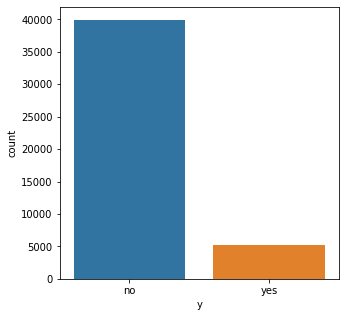

In [24]:
# Membuat visualisasi data
f, ax = plt.subplots(figsize=(5, 5))
ax = sns.countplot(x="y", data=df_bank_full)
plt.show()

Based on the above results:
- There are 39.919 people who do not want to subscribe to 'Term Deposits'.
- There are 5.289 people who have subscribed to 'Term Deposits'.

### #5 REVIEWING THE DATA DESCRIPTION

In [26]:
df_bank_full.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000
mean,40.936294,1362.228676,15.806052,258.180211,2.763560,40.200562,0.580362
std,10.618823,3044.794660,8.322417,257.527769,3.097582,100.131506,2.303513
min,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


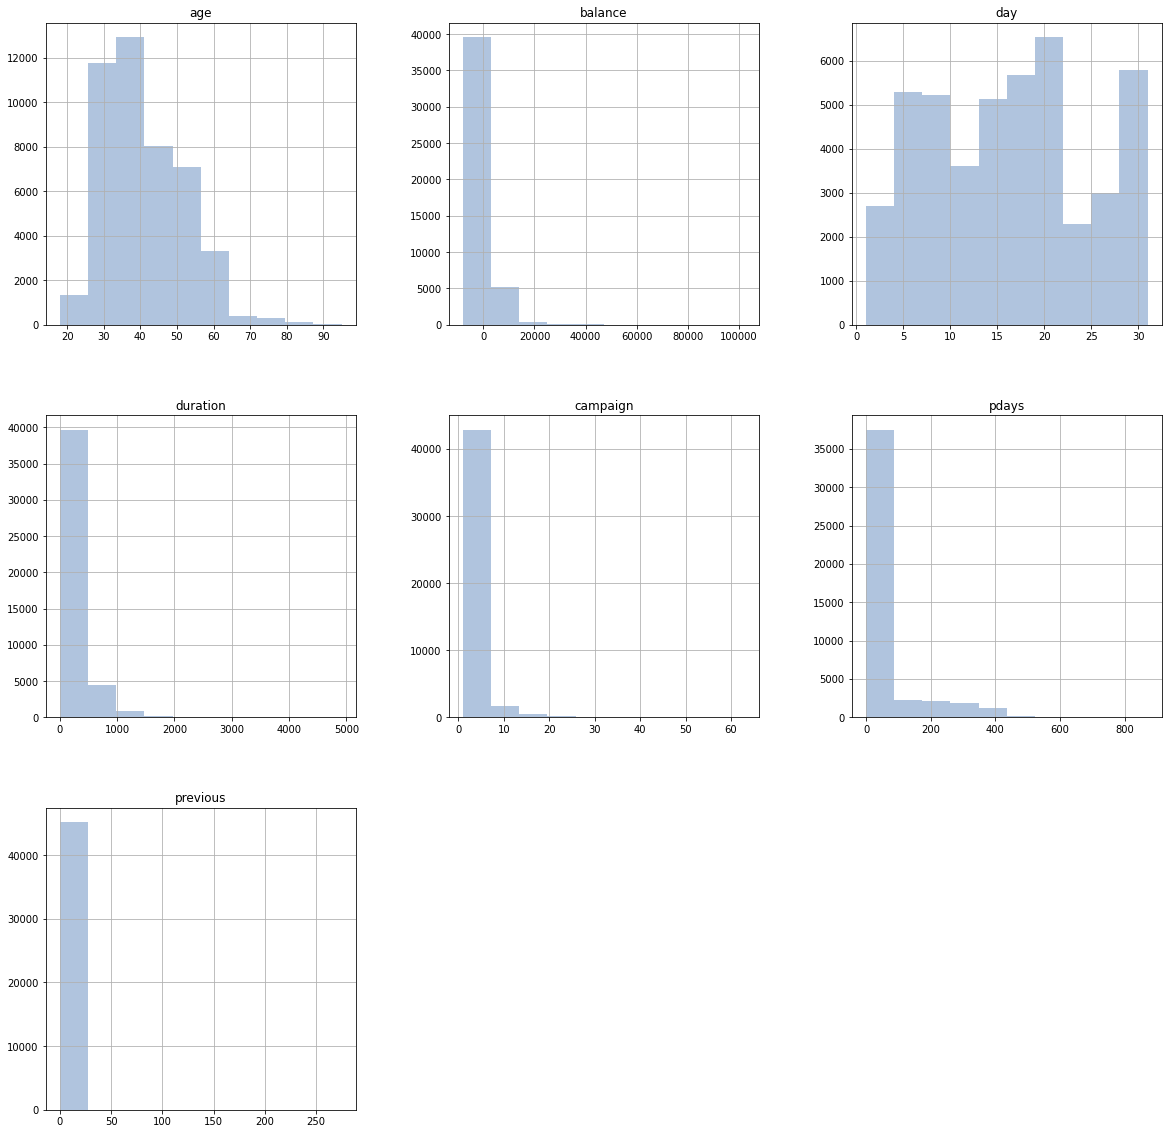

In [28]:
# DATA VISUALIZATION OF EVERY VARIABLE
df_bank_full.hist(figsize=(20, 20),color="lightsteelblue")
plt.show()

### #6 VIEW DATA VISUALIZATION THROUGH BOXLOT

### What is Outlier?
Outlier is a data value that is different from other data.

### AGE

<AxesSubplot:>

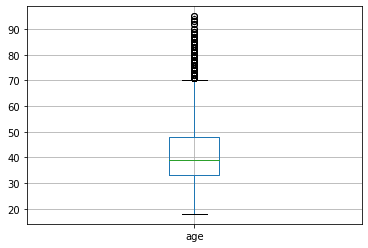

In [32]:
# View Box Plot of Variable 'Age'
df_bank_full.boxplot(column = ['age'],figsize=(6,4))

"Based on the Box Plot above, the outliers are clients whose 'Age' is 70"

"Let's count the number of clients who are over the age of 70"

In [37]:
# View the number of data with age > 70 years
df_bank_full[df_bank_full['age']>70].count()

age          487
job          487
marital      487
education    487
default      487
balance      487
housing      487
loan         487
contact      487
day          487
month        487
duration     487
campaign     487
pdays        487
previous     487
poutcome     487
y            487
dtype: int64

Turns out, there are '487 clients' with age > 70 years.

### *question*
Do clients with age > 70 years 'subscribe' Term Deposits or 'NO'?

In [34]:
df_bank_full[(df_bank_full['age']>70) & (df_bank_full['y']=='yes')]['y'].count()

218

There are 218 clients who are over 70 years old and subscribe to 'Term Deposits'.

### BALANCE

<AxesSubplot:>

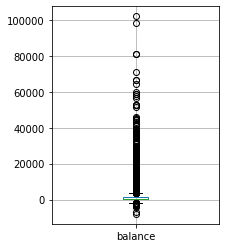

In [46]:
df_bank_full.boxplot(column = ['balance'],figsize=(3,4))

### DURATION

<AxesSubplot:>

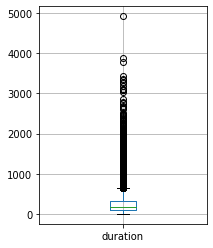

In [47]:
df_bank_full.boxplot(column = ['duration'],figsize=(3,4))

### CAMPAIGN

<AxesSubplot:>

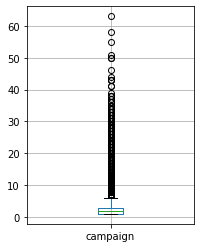

In [48]:
df_bank_full.boxplot(column = ['campaign'],figsize=(3,4))

### PDAYS

<AxesSubplot:>

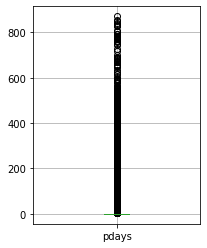

In [53]:
df_bank_full.boxplot(column = ['pdays'],figsize=(3,4))

### PREVIOUS

<AxesSubplot:>

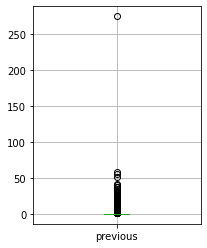

In [54]:
df_bank_full.boxplot(column = ['previous'],figsize=(3,4))

Based on the Box Plot view above,
There is 1 data in the 'Previous' variable whose value is far from other data, namely data with a value of 250 and above. So, we will delete the data.

In [55]:
# Create a variable to hold 'Previous' data with a value > 250
df_previous_outlier = df_bank_full[df_bank_full['previous']>250].index

In [56]:
# Drop df_previous_outlier
df_bank_full.drop(df_previous_outlier, inplace=True)

In [57]:
# Check the amount of data back
df_bank_full.shape

(45207, 17)

"Now the data count has changed, initially there were 45,208 ROW & 17 COLUMN, to 45.207 ROW & 17 COLUMN."

### #7 MAPPED CATEGORY DATA INTO NUMBERS
DATA CATEGORY (MONTH, EDUCATION, MARITAL, HOUSING, DEFAULT, LOAN, JOB, Y)
will be mapped into NUMBERS.

In [59]:
df_bank_full['month']= df_bank_full['month'].replace({'jan':1, 'feb':2,'mar':3,'apr':4,
                                                      'may':5,'jun':6, 'jul':7,'aug':8,
                                                      'sep':9,'oct':10,'nov':11,'dec':12})

df_bank_full['education'] = df_bank_full['education'].replace({'primary':1,'secondary':2,
                                                               'tertiary':3,'unknown':4})

df_bank_full['marital'] = df_bank_full['marital'].replace({'single':1,'married':2,'divorced':3})

df_bank_full['housing'] = df_bank_full['housing'].replace({'yes':1, 'no':0})

df_bank_full['default'] = df_bank_full['default'].replace({'yes':1, 'no':0})

df_bank_full['loan'] = df_bank_full['loan'].replace({'yes':1, 'no':0})

df_bank_full['job']= df_bank_full['job'].replace({'admin.':1, 'blue-collar':2,'entrepreneur':3,'housemaid':4,
                                                  'management':5,'retired':6, 'self-employed':7,'services':8,
                                                  'student':9,'technician':10,'unemployed':11,'unknown':12})

df_bank_full['y'] = df_bank_full['y'].replace({'yes':1, 'no': 0})

### HEATMAP PLOT DATA VISUALIZATION

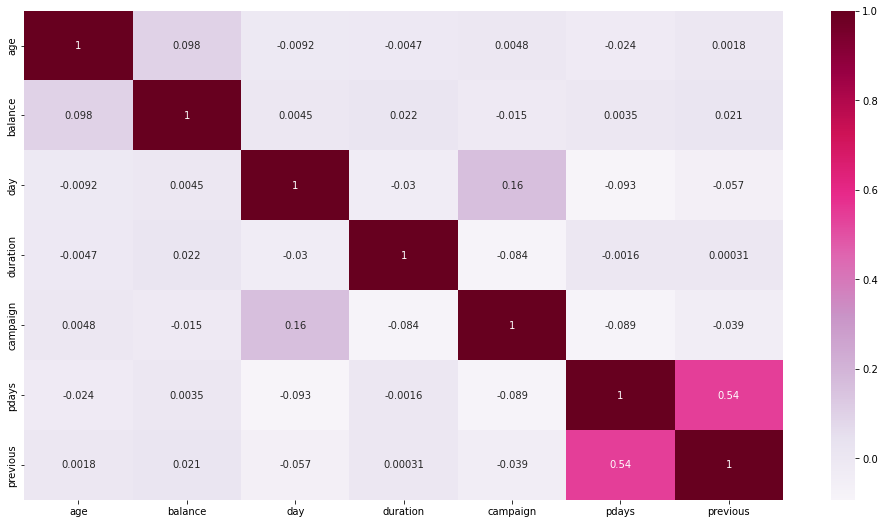

In [63]:
# Visualisasi korelasi menggunakan heatmap plot
plt.figure(figsize=(17, 9))
ax = sns.heatmap(df_bank_full.corr(), annot=True, cmap="PuRd")

### question
"Seeing the relationship of 'EDUCATION' to the client's decision in choosing whether to subscribe to 'Terms Deposit', does it affect?"

Information :
- Primary : 1
- Secondary: 2
- Tertiary : 3
- Unknown : 4

0 & 1?
- 0 : NO SUBSCRIPTION 'Terms Deposit'
- 1 : SUBSCRIBE 'Terms Deposit'

In [64]:
print(df_bank_full.groupby(['y','education']).size())

y  education
0  1             6259
   2            20750
   3            11304
   4             1605
1  1              591
   2             2450
   3             1996
   4              252
dtype: int64


Based on the above results,
There is a relationship between 'client' and 'Education' affecting, where, there are '1.605 Client' with 'Unknown Education' choosing not to be a customer.

### question
How does 'MARITAL' influence 'CLIENTS' in their decision to choose whether to subscribe to 'Term Deposits', does it have any effect?

Information
- Single : 1
- Married : 2
- Divorced : 3

0 & 1?
- 0 : NO SUBSCRIPTION 'Terms Deposit'
- 1 : SUBSCRIBE 'Terms Deposit'

In [65]:
print(df_bank_full.groupby(['y','marital']).size())

y  marital
0  3           4585
   2          24455
   1          10878
1  3            622
   2           2755
   1           1912
dtype: int64


Based on the above results,
There is an effect of 'marriage' on 'clients', as many as 24,455 married clients choose not to subscribe to 'Term Deposits'.

### data visualization

### #1

Clients who subscribe to 'Terms Deposits' and do not subscribe to 'Terms Deposits' based on 'AGE'.

0 & 1?

    0 : NO SUBSCRIPTION 'Terms Deposit'
    1 : SUBSCRIBE 'Terms Deposit'


C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


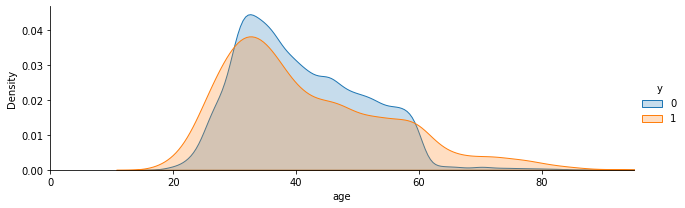

In [66]:
df_age = sns.FacetGrid(df_bank_full, hue="y", aspect = 3)
df_age.map(sns.kdeplot, 'age', shade=True)
df_age.set(xlim=(0, df_bank_full['age'].max()))
df_age.add_legend()

plt.show()

- Blue : Subscribe to 'Terms Deposit'
- Orange : Unsubscribe 'Terms Deposit'

Based on the Data Visualization above,
Clients aged between 30-40 years, many do not subscribe to 'Terms Deposit'.

### #2

Seeing the effect of 'HOUSING, DEFAULT, and LOAN' on 'CLIENT' in deciding to subscribe to 'Term Deposits'.

In [68]:
def barh_chart(feature):
    yes = df_bank_full[df_bank_full['y']==1][feature].value_counts()
    no = df_bank_full[df_bank_full['y']==0][feature].value_counts()
    df = pd.DataFrame([yes,no])
    df.index = ['Yes', 'No']
    df.plot(kind = 'barh', stacked = True, figsize = (10,5))

### HOUSING

Housing Description
- YES (Orange) = 1
- NO (Blue)    = 0

0 & 1?

- 0 : NO SUBSCRIPTION 'Terms Deposit'
- 1 : SUBSCRIBE 'Terms Deposit'

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000., 45000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

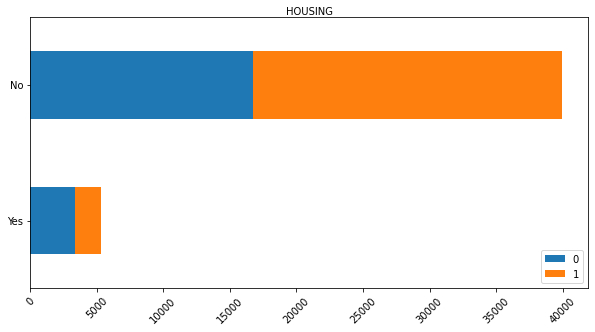

In [76]:
barh_chart('housing')
plt.title("HOUSING", pad=2, fontsize = 10)
plt.xticks(rotation = 45)

Based on the above results,
'Clients' who have 'Housing Loans' are more likely to subscribe to 'Terms Deposits' when compared to 'Clients' who do not have 'Housing Loans'.

### DEFAULT

Default Description

- YES(Orange) = 1
- NO (Blue) = 0

Clients who subscribe to 'Terms Deposits' and do not subscribe to 'Terms Deposits' based on 'AGE'.

0 & 1?

- 0 : NO SUBSCRIPTION 'Terms Deposit'
- 1 : SUBSCRIBE 'Terms Deposit'

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000., 45000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

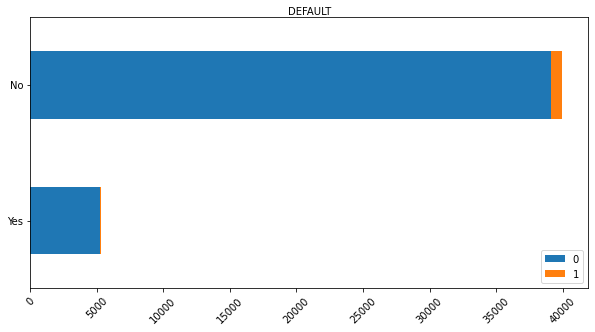

In [75]:
barh_chart('default')
plt.title("DEFAULT", pad=2, fontsize = 10)
plt.xticks(rotation = 45)

Based on the above results, 'Clients' who have 'unfinished credit dependents' and those who do not have 'unfinished credit guarantees' have a tendency to not subscribe to 'Term Deposits'.

### LOAN

Loan Description

- YES(Orange) = 1
- NO (Blue) = 0

Clients who subscribe to 'Terms Deposits' and do not subscribe to 'Terms Deposits' based on 'AGE'.

0 & 1?

- 0 : NO SUBSCRIPTION 'Terms Deposit'
- 1 : SUBSCRIBE 'Terms Deposit'

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000., 45000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

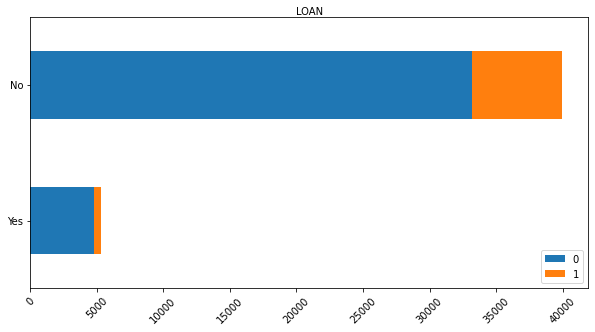

In [78]:
barh_chart('loan')
plt.title("LOAN", pad=2, fontsize = 10)
plt.xticks(rotation = 45)

Based on the above, 'Clients' who have 'loans' and those who do not have 'loans' have a tendency to not subscribe to 'Terms Deposits'.

## MACHINE LEARNING MODEL
1. Logistic Regression
2. K-Nearest Neighbour
3. Support Vector Machine
4. Decision Tree
5. Random Forest
6. Naive Bayes
7. Confusion Matrix

## Data Preparation

### Removed 'contact' and 'poutcome' variables
Because it has no influence on the client's decision to join as a bank customer or not

In [79]:
# Delete variabel 'contact' dan 'poutcome'
df_bank_full = df_bank_full.drop(columns=['contact','poutcome'])

### Prepare 'data training' and 'data testing'

In [80]:
X = df_bank_full.drop('y', axis=1)
y = df_bank_full['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =1)

### 1. Logistic Regression

In [81]:
logistic = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=1)
logistic.fit(X_train, y_train)
logreg_pred = logistic.predict(X_test)

print(classification_report(y_test, logreg_pred))
print("Accuracy:",metrics.accuracy_score(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9974
           1       0.56      0.19      0.29      1328

    accuracy                           0.89     11302
   macro avg       0.73      0.59      0.61     11302
weighted avg       0.86      0.89      0.86     11302

Accuracy: 0.8877189877897718


Based on the above results,

The results obtained from the model accuracy of 89%.
However, if you look at the results of 'Precision (0.56), Recall (0.19), and F1-score (0.29)' for the 'YES' option (Subscribing to Time Deposits) it is still not good.

### 2. K-Nearest Neighbour

In [82]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', 
                                 algorithm='auto', leaf_size=30, p=2, 
                                 metric='minkowski', metric_params=None)

# Melatih model menggunakan data train
knn.fit(X_train, y_train)

# Hasil predict
knn_pred = knn.predict(X_test)

print(classification_report(knn_pred,y_test))
print("Accuracy:",metrics.accuracy_score( knn_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94     10590
           1       0.27      0.50      0.35       712

    accuracy                           0.88     11302
   macro avg       0.62      0.70      0.64     11302
weighted avg       0.92      0.88      0.90     11302

Accuracy: 0.8824986728012741


Based on the above results,

The results obtained model accuracy of 88%.
However, if you look at the results of 'Precision (0.27), Recall (0.50), and F1-score (0.35)' for the 'YES' option (Subscribe to Time Deposits) it is still not good.

### 3. Support Vector Machine (SVM)

In [83]:
svm_model = LinearSVC()
svm_model.fit(X_train,y_train)

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [84]:
svm_score_train = svm_model.score(X_train, y_train)
print(svm_score_train)

0.8670107653738387


In [85]:
svm_model.fit(X_test,y_test)

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [86]:
svm_score_test = svm_model.score(X_test, y_test)
print(svm_score_test)

0.8157848168465758


In [87]:
svm_pred = svm_model.predict(X_test)
print(classification_report(svm_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      9468
           1       0.41      0.29      0.34      1834

    accuracy                           0.82     11302
   macro avg       0.64      0.61      0.62     11302
weighted avg       0.80      0.82      0.80     11302



Based on the above results,

The results obtained model accuracy of 82%.
However, if you look at the results of 'Precision (0.41), Recall (0.29), and F1-score (0.34)' for the 'YES' option (Subscribe to Time Deposits) it is still not good.

### 4. Decision Tree

In [90]:
# Create Decision Tree classifer object
decision = DecisionTreeClassifier()

# Train Decision Tree Classifer
decision = decision.fit(X_train,y_train)

# Predict the response for test dataset
dt_pred = decision.predict(X_test)

print(classification_report(y_test, dt_pred))
print("Accuracy:",metrics.accuracy_score(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      9974
           1       0.44      0.48      0.46      1328

    accuracy                           0.87     11302
   macro avg       0.69      0.70      0.69     11302
weighted avg       0.87      0.87      0.87     11302

Accuracy: 0.8686073261369669


Based on the above results,

The results obtained model accuracy of 87%.
However, if you look at the results of 'Precision (0.44), Recall (0.48), and F1-score (0.46)' for the 'YES' option (Subscribe to Time Deposits) it is still not good.

### 5. Random Forest

In [91]:
randomforest = RandomForestClassifier(n_estimators=100)
 
randomforest.fit(X_train,y_train) 

randfor_pred = randomforest.predict(X_test)

print(classification_report(y_test, randfor_pred))
print("Accuracy:",metrics.accuracy_score(y_test, randfor_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      9974
           1       0.61      0.38      0.47      1328

    accuracy                           0.90     11302
   macro avg       0.77      0.67      0.70     11302
weighted avg       0.88      0.90      0.89     11302

Accuracy: 0.898513537427004


Based on the above results,
A good 90% accuracy result was obtained.

### 6. Naive Bayes

In [92]:
naive = GaussianNB()

naive.fit(X_train,y_train)

nb_pred = naive.predict(X_test)

print(classification_report(y_test, nb_pred))
print("Accuracy:",metrics.accuracy_score(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      9974
           1       0.41      0.39      0.40      1328

    accuracy                           0.86     11302
   macro avg       0.66      0.66      0.66     11302
weighted avg       0.86      0.86      0.86     11302

Accuracy: 0.8619713325075208


Based on the above results,
The results obtained are a good 86% model accuracy.

### 7. Confussion Matrix

### Logistic Regression

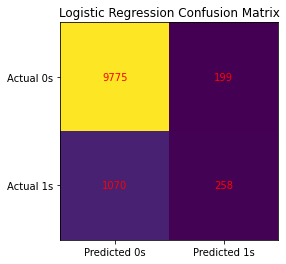

In [93]:
cm = confusion_matrix(y_test, logreg_pred)
fig, ax = plt.subplots(figsize=(4, 4))

plt.title("Logistic Regression Confusion Matrix")

ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

### K-Nearest Neighbour

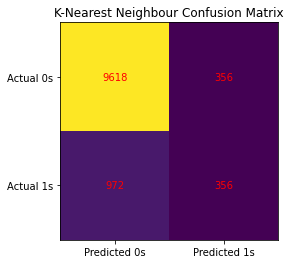

In [94]:
cm = confusion_matrix(y_test, knn_pred)
fig, ax = plt.subplots(figsize=(4, 4))
plt.title("K-Nearest Neighbour Confusion Matrix")

ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

### Suport Vector Machine

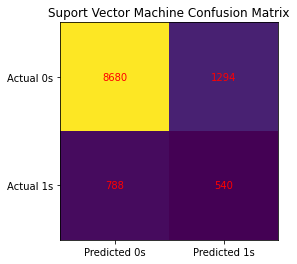

In [95]:
cm = confusion_matrix(y_test, svm_pred)
fig, ax = plt.subplots(figsize=(4, 4))
plt.title("Suport Vector Machine Confusion Matrix")

ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

### Decision Tree

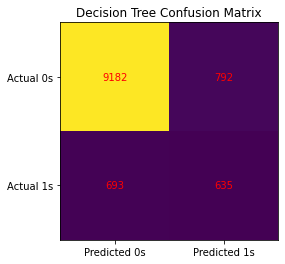

In [96]:
cm = confusion_matrix(y_test, dt_pred)
fig, ax = plt.subplots(figsize=(4, 4))

plt.title("Decision Tree Confusion Matrix")

ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

### Random Forest

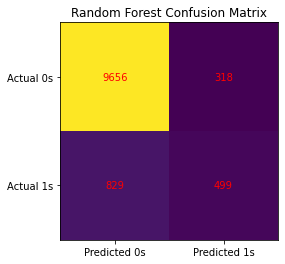

In [97]:
cm = confusion_matrix(y_test, randfor_pred)
fig, ax = plt.subplots(figsize=(4, 4))

plt.title("Random Forest Confusion Matrix")

ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

### Naive Bayes

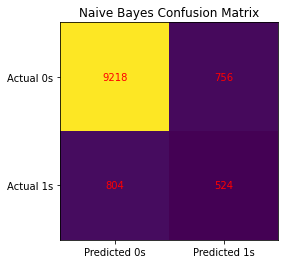

In [98]:
cm = confusion_matrix(y_test, nb_pred)
fig, ax = plt.subplots(figsize=(4, 4))

plt.title("Naive Bayes Confusion Matrix")

ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

### CONCLUSION

- A total of 39,919 clients have not subscribed to 'Term Deposits' and 5,289 clients have subscribed to 'Terms Deposits' at the bank.
- From Machine Learning modeling, everything has a pretty good accuracy.
1. Logistic Regression = 89%
2. K-Nearest Neighbor = 88%
3. Support Vector Machine = 82%
4. Decision Tree = 87%
5. Random Forest = 90%
6. Naive Bayes = 86%
- Although the accuracy of each model used is quite good, the precision, recall, and f1-score for the 'YES' class are still not good.

### Algoritma yang paling sesuai?

"Random forest pada dasarnya merupakan kumpulan dari beberapa decision tree. Kumpulan dari pohon-pohon tersebut saling berhubungan hingga akhirnya dapat menghasilkan prediksi yang lebih akurat dan stabil."

Menurut saya Algoritma Random Forest merupakan Algoritma yang cocok dalam penyelesaian dataset ini karena algoritma ini dapat digunakan untuk menyelesaikan masalah dengan kumpulan data yang berukuran besar.